# Dataquest Mission - Graduate Earnings Analysis

This Jupyter Notebook loosely follows the Dataquest guided project focusing on job outcomes for college graduates between 2010 and 2012. The data was originally released by the American Community Survey, after which FiveThirtyEight cleaned the aggregate data and posted it on their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/college-majors). The definitions of each column may be found there as well.

The following notebook quickly explores the following questions, using visualisations tasked in the mission:
- do students in more popular majors make more money?
- do students that majored in subjects that were majority female make more money?
- is there any link between number of full time employees and median salary?

As noted earlier, the data has already been cleaned and so it is loaded below, to begin analysis.


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


As earnings is the primary focus of this analysis, it is important to first note which Major Categories attract the highest graduate salaries. This is demonstrated in the box plot below. It can be seen that technical majors (engineering, computing) attract the highest range of median salaries, while creative and carer majors (education, arts, social work) attract the lowest salaries.

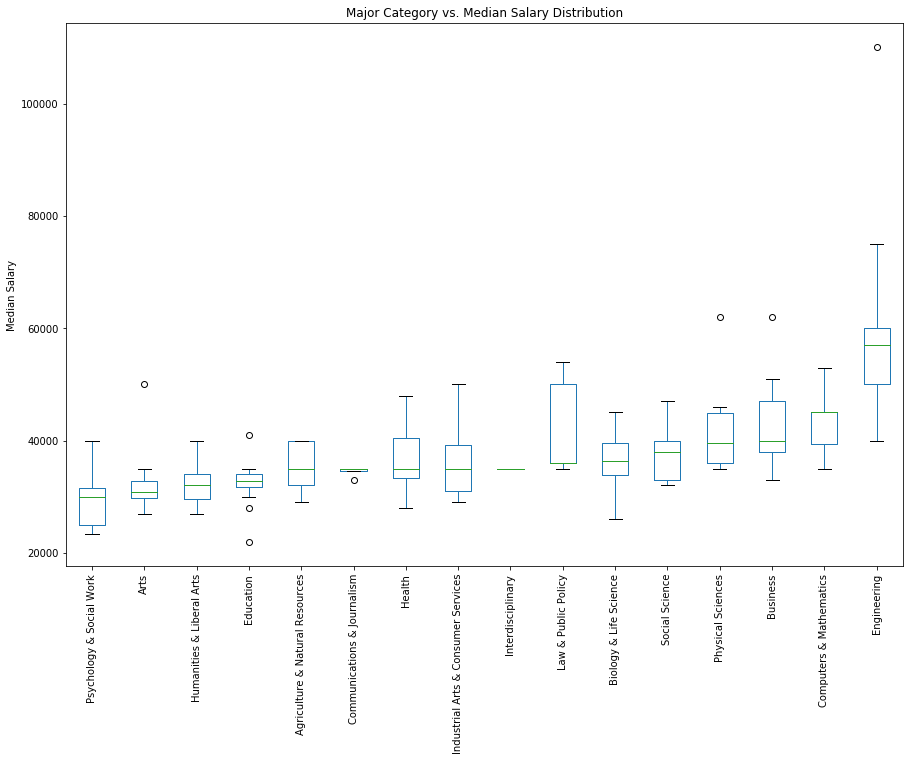

In [78]:
df = recent_grads[['Major_category','Median']]
df = df.groupby('Major_category')
df.head()

df2 = pd.DataFrame({col:vals['Median'] for col, vals in df})
df2.head()
meds = df2.median()
meds.sort_values(ascending=True, inplace=True)
df2 = df2[meds.index]
df2.plot(kind='box', rot=90, figsize = (15,10), title='Major Category vs. Median Salary Distribution')

ax1 = plt.axes()
ax1.set(ylabel = 'Median Salary')

plt.show()

# Do students in more popular majors make more money?

At the lower end of the spectrum, there isn't a clear relationship between the number of students studying a certain major and the median earnings. It can be seen that less popular majors have a greater median salary range, over more popular majors. Examining the 10 least popular majors, it can be inferred that the higher paying majors tend to be technical (e.g. engineering, science), as the box plot above demonstrates these are the highest paying major categories.
Some less popular majors may also pay less than popular majors perhaps due to its obscurity or lack of demand for skills in this space (e.g. Soil Science).
However, it is clear that the median salary tends to drop in majors that are more popular with students. This could be because of the higher supply of graduates, combined with the lack of demand for graduates of certain majors.

[<matplotlib.text.Text at 0x10f14b470>, <matplotlib.text.Text at 0x10f0e0518>]

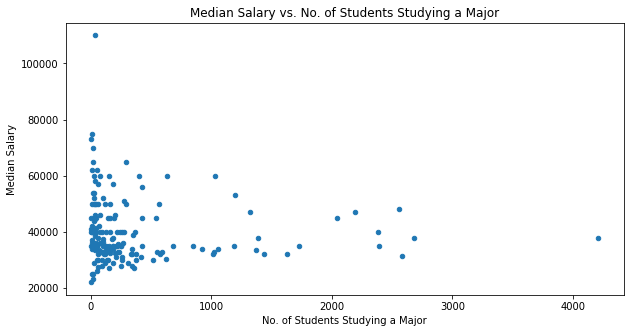

In [79]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median Salary vs. No. of Students Studying a Major', figsize=(10,5))
ax = plt.axes()
ax.set(ylabel = 'Median Salary', xlabel = 'No. of Students Studying a Major')

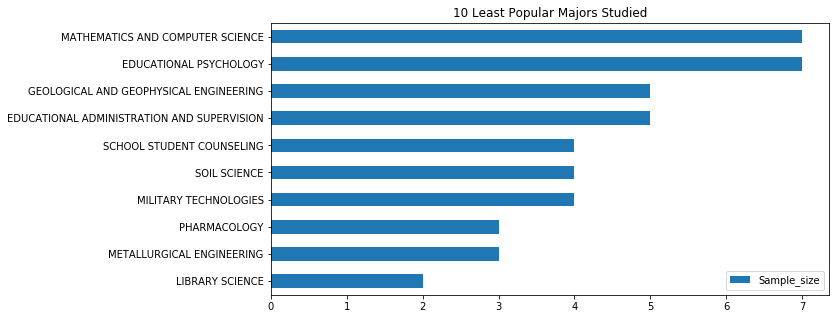

In [80]:
recent_grads.sort_values(by='Sample_size', inplace='true')

recent_grads[:10].plot.barh(x='Major', y='Sample_size', title='10 Least Popular Majors Studied', figsize=(10,5))
ax1 = plt.axes()
y_axis = ax1.axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

# Do students that majored in subjects that were majority female make more money?

There appears to be an inverse relationship between percentage of women in a major, and median salary. As the share of women in the major increases, the median salary can be seen to steadily decrease.
Majors dominated by females tend to be roles that are in carer positions (e.g. nursing, elementary education, special needs education), followed by language and arts (not shown in graph). Majors with the lowest female representation tend to be technical majors, which were also seen in the previous analysis to attract the highest median salaries.
However, it is also possible that the average earnings tend to be lower, simply because more females are working in this space. As the [New York Times](https://www.nytimes.com/2016/03/20/upshot/as-women-take-over-a-male-dominated-field-the-pay-drops.html?_r=1) reported, studies have shown that as men enter an industry that was traditionally in the female domain, the average salary tends to rise. This suggests that females are indeed paid less than males, even when performing the same role.


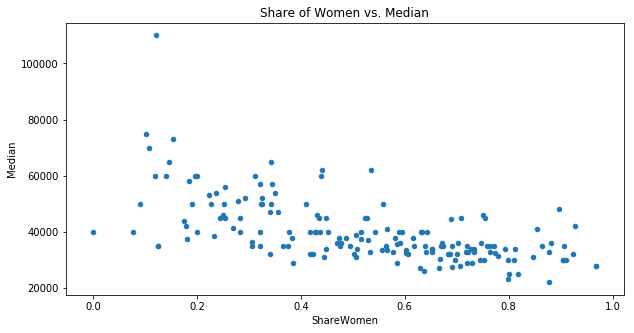

In [81]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Share of Women vs. Median', figsize=(10,5))

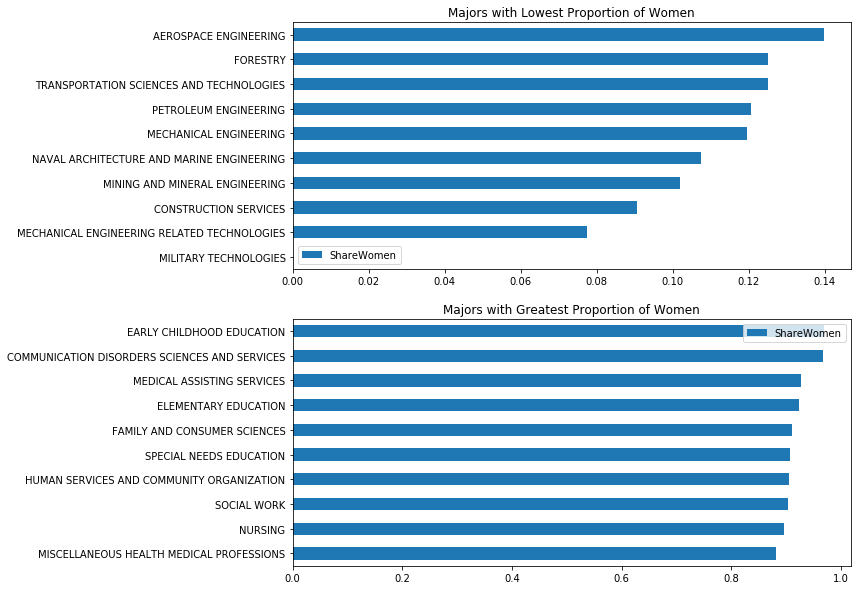

In [82]:
recent_grads.sort_values(by='ShareWomen', inplace='true')
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(2, 1, 1)
recent_grads[:10].plot.barh(x='Major', y='ShareWomen', ax=ax1, title='Majors with Lowest Proportion of Women')
y_axis = ax1.axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

ax2 = plt.subplot(2, 1, 2)
recent_grads[-10:].plot.barh(x='Major', y='ShareWomen', ax=ax2, title='Majors with Greatest Proportion of Women')
y_axis = ax2.axes.get_yaxis()
y_label = y_axis.get_label()
y_label.set_visible(False)

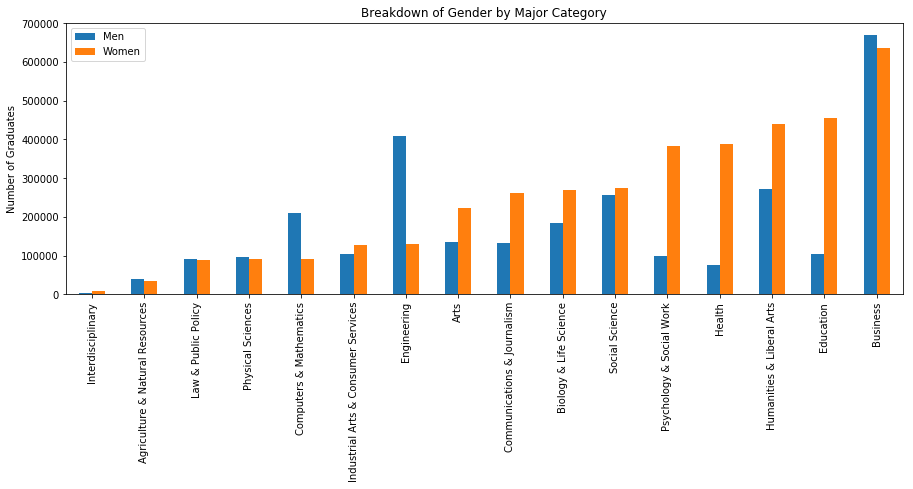

In [83]:
tbl = recent_grads.pivot_table(index='Major_category', values=['Men','Women'],aggfunc=np.sum)
tbl = tbl.sort_values(by='Women')
tbl.plot.bar(x=tbl.index,y=['Men','Women'], figsize=(15,5), title='Breakdown of Gender by Major Category')
ax = plt.axes()
ax.get_xaxis().get_label().set_visible(False)
ax.set(ylabel = 'Number of Graduates')

# Is there any link between the number of full-time employees and median salary?

Again at the lower end of the spectrum, there is no clear relationship between number of employees and median salaries. This could be because there are a small number of employees due to scarcity of skills (e.g. mechanical engineering) which drives salary up, or lack of demand for skills (e.g. library science) which drives salary down.
However, as the number of full time employees increases for a particular major, the median salary can be seen to decrease and plateau. This is likely due to the high supply of graduates/employees seeking work in those fields, relieving employers from having to compete for talent as aggressively. This is verified by the strong correlation seen between the number of students studying a particular major and the number of full time employees for a given major.

[<matplotlib.text.Text at 0x1101c8a58>, <matplotlib.text.Text at 0x1101126d8>]

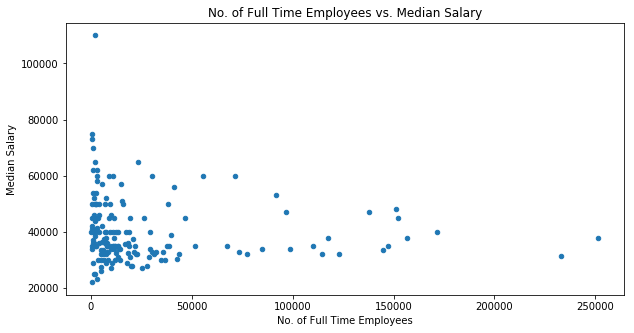

In [84]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='No. of Full Time Employees vs. Median Salary', figsize=(10,5))
ax = plt.axes()
ax.set(xlabel = 'No. of Full Time Employees', ylabel = 'Median Salary')

[<matplotlib.text.Text at 0x110243b00>, <matplotlib.text.Text at 0x1100858d0>]

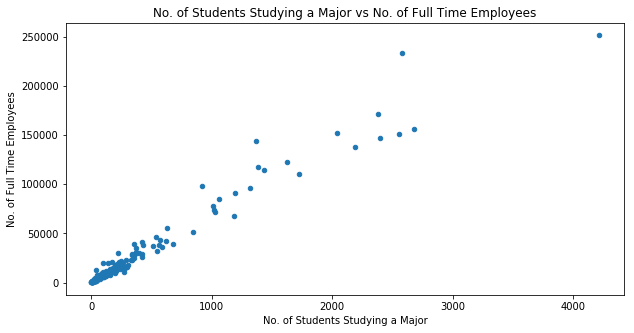

In [85]:
recent_grads.plot(x='Sample_size', y='Full_time', kind='scatter', title='No. of Students Studying a Major vs No. of Full Time Employees', figsize=(10,5))
ax = plt.axes()
ax.set(xlabel = 'No. of Students Studying a Major', ylabel = 'No. of Full Time Employees')